<a href="https://colab.research.google.com/github/JonathanNdambaPro/NLP/blob/master/Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis
import pandas as pd
import numpy as np
import os 
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.tokenize.casual import casual_tokenize
import nltk
from nltk.stem.porter import PorterStemmer
import re 
from collections import Counter, OrderedDict

import tensorflow_hub as hub


import numpy as np
from gensim import corpora, models
from gensim.models import Word2Vec
import spacy

import pyLDAvis
import pyLDAvis.gensim
import warnings
from gensim.models.phrases import Phrases, Phraser
from wordcloud import WordCloud

warnings.filterwarnings("ignore", category=DeprecationWarning)


np.random.seed(2018)

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Tweet analysis')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

     |████████████████████████████████| 1.6MB 3.2MB/s 
     |████████████████████████████████| 552kB 42.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=0ecd2d05b290a6a93c1fe3ce0f1f07c320cf685226b15cc2dd68c1dd4992e896
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c982ed8cdcec0d459cc629cb6c666b260371c64b938a8f115f2ead4743443448
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def preprocessing(data):
  stemmer = PorterStemmer()
  nlp = spacy.load('en', disable=['parser', 'ner'])
  nltk.download('stopwords')
  stop_words = nltk.corpus.stopwords.words('english')

  data['text'] = data['text'].astype(str).apply((lambda x: nlp(x)))
  data['text'] = data['text'].astype(str).apply(lambda x: casual_tokenize(x))


  data['text'] = data['text'].apply(lambda x: [w.lower() for w in x if w not in stop_words
                                                                            and len(w) > 3 
                                                                            and w not in '- \t\n.,;!?'
                                                                            and w not in gensim.parsing.preprocessing.STOPWORDS])

  data['text'] = data['text'].apply(lambda x: [stemmer.stem(w).strip("'") for w in x])
  Vocabulary = [w for W in data['text'].to_list() for w in W ]
  bag_of_words = Counter(Vocabulary)
  corpus = ' '.join(Vocabulary)

  return data, Vocabulary, bag_of_words, corpus

def words_cloud(Vocabulary):
  long_string = ','.join(Vocabulary)

  wordcloud = WordCloud(background_color="white", height=700, width=700,
                        max_words=5000, 
                        contour_width=3, contour_color='steelblue')

  wordcloud.generate(long_string)

  return wordcloud.to_image()

Classe par ordre d'elements : 
- Neutral
- Positive
- negative

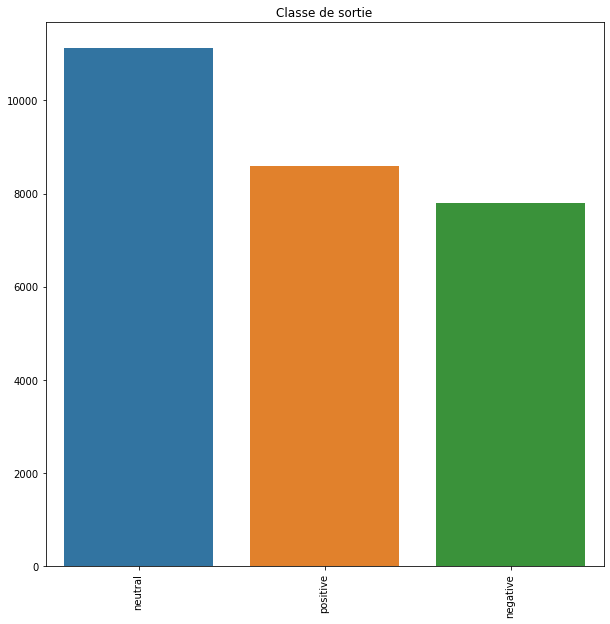

neutral     11118
positive     8582
negative     7786
Name: sentiment, dtype: int64




neutral     0.404497
positive    0.312232
negative    0.283271
Name: sentiment, dtype: float64

In [ ]:
train_data.sentiment.value_counts().plot.bar(figsize=(10, 10))
sns.barplot(x=train_data.sentiment.value_counts().index, y=train_data.sentiment.value_counts().values).set_title("Classe de sortie")
plt.show()
print(train_data.sentiment.value_counts())
print('\n')
train_data.sentiment.value_counts(normalize=True)

In [ ]:
train_data_prepross, Vocabulary, bag_of_words, corpus = preprocessing(train_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Wordcloud Global

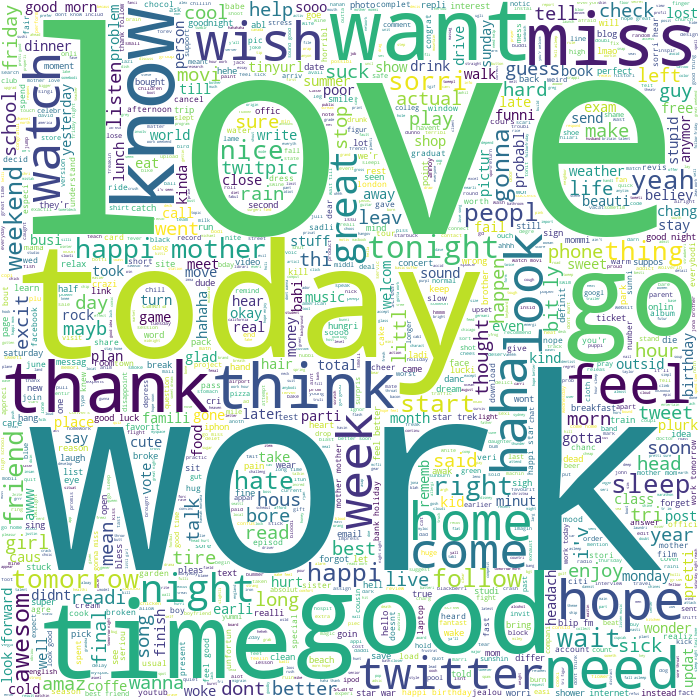

In [ ]:
words_cloud(Vocabulary)

### Wordcloud Neutral

In [ ]:
Vocabulary_neutral = [w for W in train_data_prepross.query('sentiment == "neutral"')['text'].to_list() for w in W ]
Vocabulary_negative = [w for W in train_data_prepross.query('sentiment == "negative"')['text'].to_list() for w in W ]
Vocabulary_positive = [w for W in train_data_prepross.query('sentiment == "positive"')['text'].to_list() for w in W ]

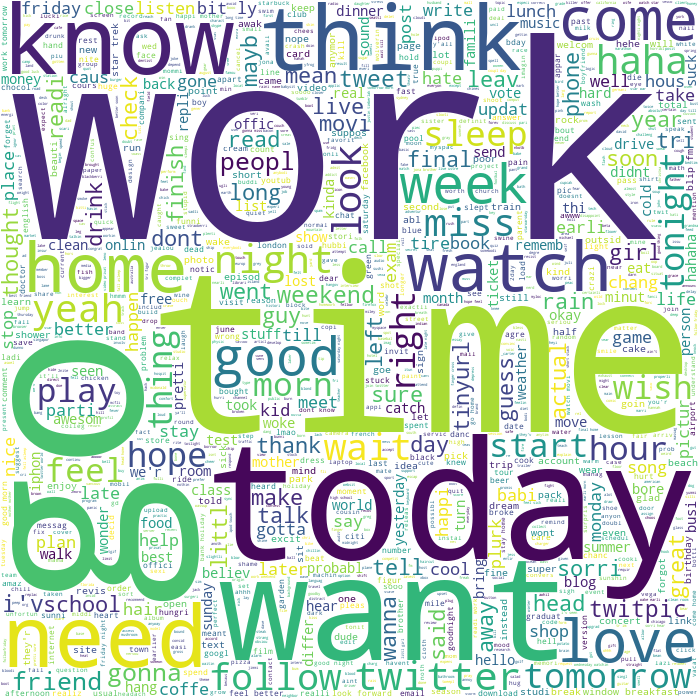

In [ ]:
words_cloud(Vocabulary_neutral)

### WordCloud Negative

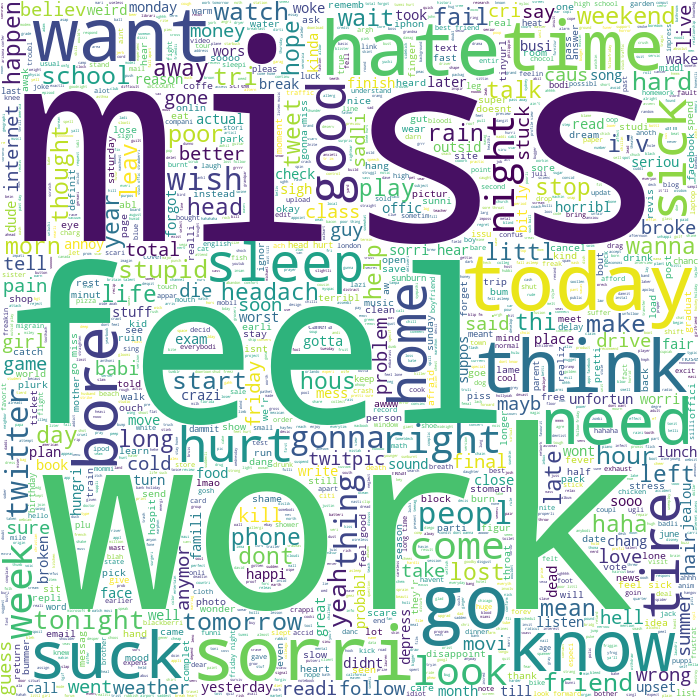

In [ ]:
words_cloud(Vocabulary_negative)

### Wordcloud Positive

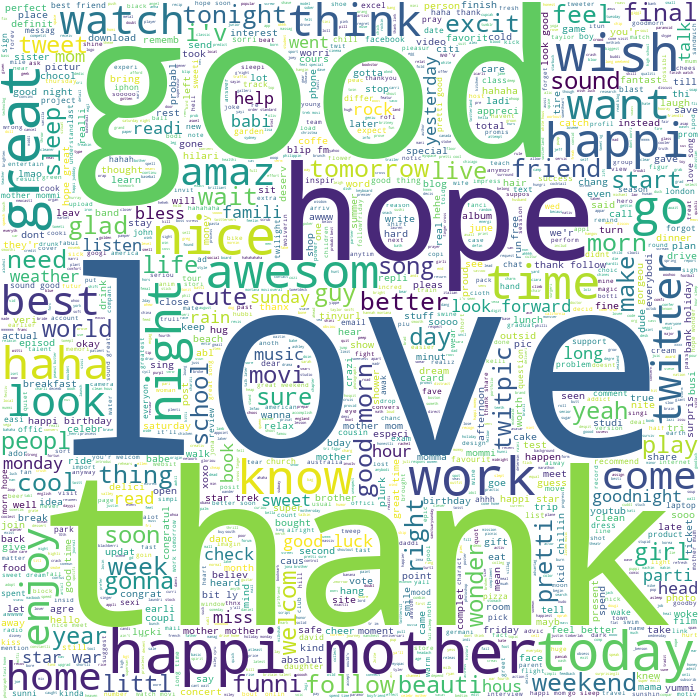

In [ ]:
words_cloud(Vocabulary_positive)

Text(0.5, 1.0, 'Postive')

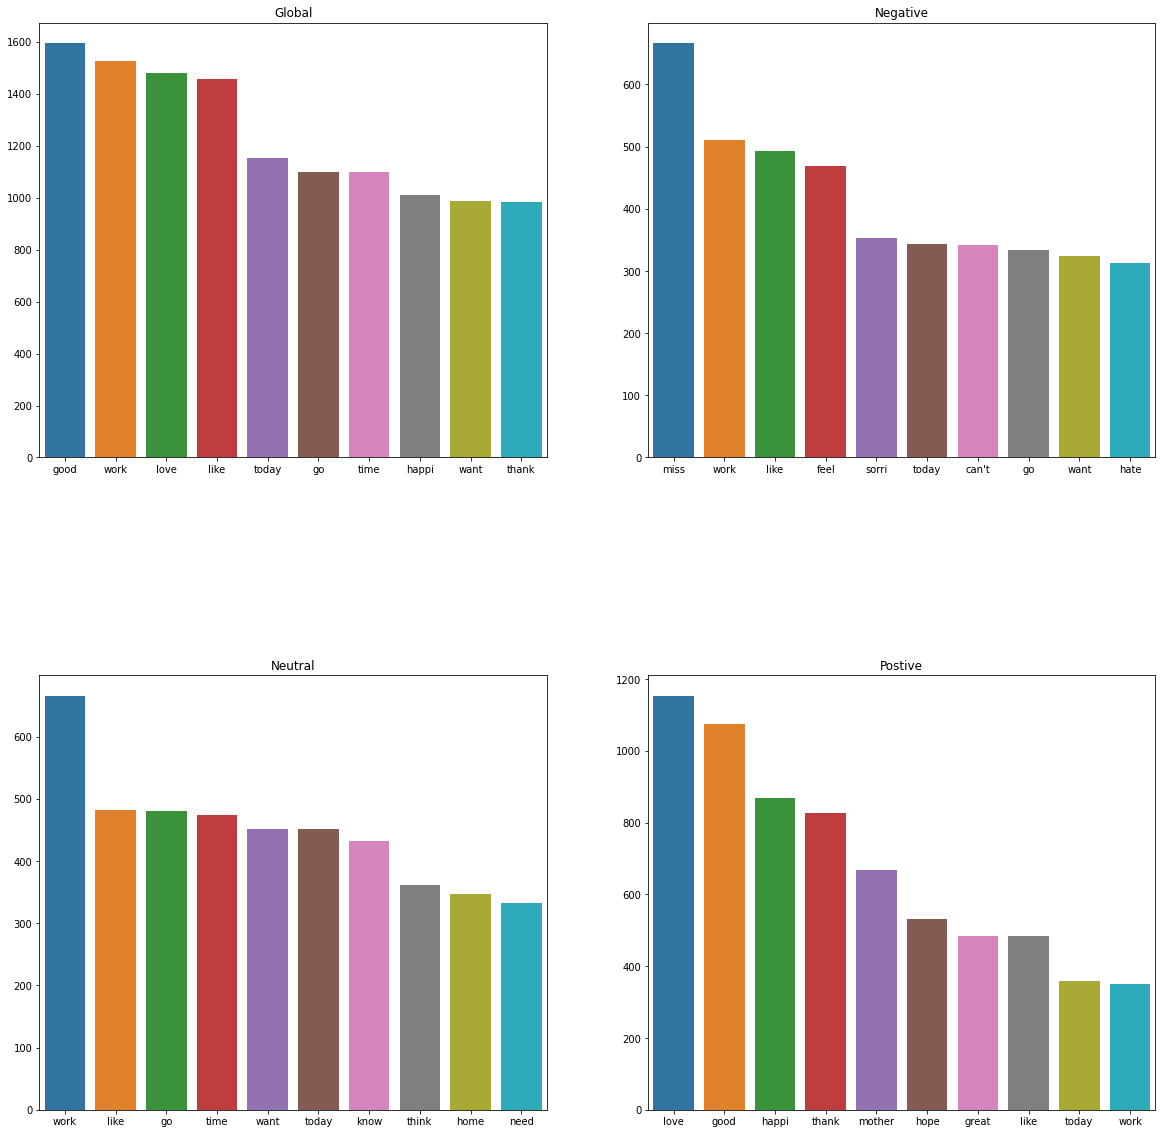

In [ ]:
bag_of_words_neutral = Counter(Vocabulary_neutral)
bag_of_words_negative = Counter(Vocabulary_negative)
bag_of_words_positive = Counter(Vocabulary_positive)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.5) 

sns.barplot(x=[x[0] for x in bag_of_words.most_common(10)], y=[x[1] for x in bag_of_words.most_common(10)],ax=axes[0][0]).set_title("Global")
sns.barplot(x=[x[0] for x in bag_of_words_neutral.most_common(10)], y=[x[1] for x in bag_of_words_neutral.most_common(10)],ax=axes[1][0]).set_title("Neutral")
sns.barplot(x=[x[0] for x in bag_of_words_negative.most_common(10)], y=[x[1] for x in bag_of_words_negative.most_common(10)],ax=axes[0][1]).set_title("Negative")
sns.barplot(x=[x[0] for x in bag_of_words_positive.most_common(10)], y=[x[1] for x in bag_of_words_positive.most_common(10)],ax=axes[1][1]).set_title("Postive")

### Contrairement a ce que l'on pourrait penser like est plus present dans les classes neutre et negative surement dit au mot don't => utilisaton de N-gramm (N = 2) pour une meilleur interpretation. 

In [ ]:
set_neutral = set(bag_of_words_neutral)
set_negative = set(bag_of_words_negative)
set_positive = set(bag_of_words_positive)

print("intersection neutral & negative : {} ".format(len(set_neutral.intersection(set_negative))))
print("intersection (neutral & negative) / neutral : {} ".format(len(set_neutral.intersection(set_negative))/len(set_neutral)))
print("intersection (neutral & negative) / negative : {} ".format(len(set_neutral.intersection(set_negative))/len(set_negative)))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print("intersection neutral & positive : {} ".format(len(set_neutral.intersection(set_positive))))
print("intersection (neutral & positive) / neutral : {} ".format(len(set_neutral.intersection(set_positive))/len(set_neutral)))
print("intersection (neutral & positive) / positive : {}".format(len(set_neutral.intersection(set_positive))/len(set_positive)))
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print("intersection negative & positive : {} ".format(len(set_positive.intersection(set_negative))))
print("intersection (negative & positive) / postive : {} ".format(len(set_positive.intersection(set_negative))/len(set_positive)))
print("intersection (negative & positive) /  negatve : {} ".format(len(set_positive.intersection(set_negative))/len(set_negative)))

intersection neutral & negative : 4215 
intersection (neutral & negative) / neutral : 0.36380113930605906 
intersection (neutral & negative) / negative : 0.4854313025452033 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
intersection neutral & positive : 4230 
intersection (neutral & positive) / neutral : 0.3650958052822372 
intersection (neutral & positive) / positive : 0.4542525773195876
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
intersection negative & positive : 3600 
intersection (negative & positive) / postive : 0.3865979381443299 
intersection (negative & positive) /  negatve : 0.4146032477254405 


In [ ]:
processed_docs= train_data_prepross['text']

dictionary = gensim.corpora.Dictionary(processed_docs)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

### LDA on BOW

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=10,
                                       id2word=dictionary, passes=2, workers=2)

vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)

pyLDAvis.display(vis)

### LDA on tf-idf

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
                                             num_topics=10,
                                             id2word=dictionary, 
                                             passes=2,
                                             workers=4)

vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary=lda_model_tfidf.id2word)

pyLDAvis.display(vis)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e3b4aa748>,
               classes=None, colormap=None, colors=None, decompose=None,
               decompose_by=None, labels=None, random_state=None)

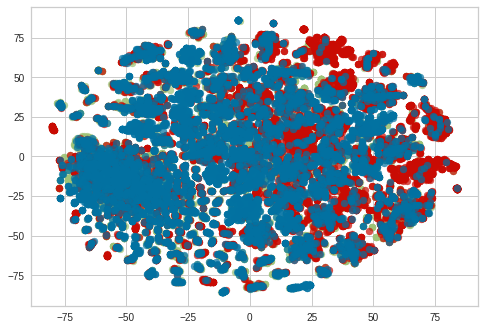

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer()

text_format = train_data_prepross['text'].apply(lambda x : ' '.join(x))
X = tfidf.fit_transform(text_format)
y = train_data_prepross['sentiment'].to_list()

tsne = TSNEVisualizer()
tsne.fit(X, y)

### Deductions :
- le nombre de mots qui se cheuvauchent entre les topics est eleve, recherche des mots pertinent our chaque classe grace a des modele de classification lineaire

- les topics subdivisent les classes en differentes sous classe => capture des  pattern detecte plus granulaire dans les classes

- les topics qui semblent negatif et positifif ne se chevauce que raremet => les topics pourrait servir de nouvelle features pour le modele de prediction

- LDA ne peut detecter uniqument des relations lineaire entre variables => recherche de "manifolds" necessaire

- Tsne appliquer sur la matrice TF-IDF montre que les relations statistiques(co-occurence/frequence d'apparation des mots ponderes) risque de ne pas etre une representation assez discriminante pour les classes => possibilite de representation de CBOW et/ou LSTM/GRU pour capture de pattern non lineaire 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

y = train_data_prepross['sentiment'].replace("neutral", 0).replace("negative", 1).replace("positive", 2).to_numpy()

X_shuffle_tf_idf, y_shuffle_tf_idf = shuffle(X, y)
rand_clf = RandomForestClassifier(n_jobs=-1)

cross_val_score(rand_clf,
                X_shuffle_tf_idf,
                y_shuffle_tf_idf,
                cv=3,
                scoring="roc_auc_ovo",
                n_jobs=-1)

array([0.83009829, 0.82903704, 0.82772714])

[[8246 1266 1606]
 [2944 4213  629]
 [2054  338 6190]]


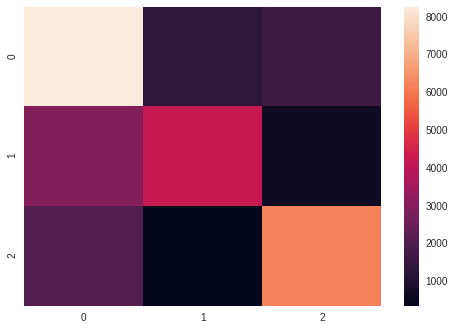

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(rand_clf, X_shuffle_tf_idf, y_shuffle_tf_idf, cv=3)
conf_mat = confusion_matrix(y_shuffle_tf_idf, y_train_pred)

print(conf_mat)

sns.heatmap(conf_mat)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision : {}".format(precision_score(y_shuffle_tf_idf,
                                              y_train_pred,
                                              average='macro')))

print("Rappel : {}".format(recall_score(y_shuffle_tf_idf,
                                        y_train_pred,
                                        average='macro')))

print("f1_score : {}".format(f1_score(y_shuffle_tf_idf,
                                      y_train_pred,
                                      average='macro')))

Precision : 0.6938653849905624
Rappel : 0.6680188863616294
f1_score : 0.6747712190598335


In [ ]:
rand_clf.fit(X_shuffle_tf_idf, y_shuffle_tf_idf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
name = tfidf.get_feature_names() 
weight = rand_clf.feature_importances_
liste_name_feature = []

for i, j in zip(name, weight): liste_name_feature.append((i, j))

liste_name_feature = sorted(liste_name_feature, key=lambda x: x[1], reverse=True)

features_name = [x[0] for x in liste_name_feature]
features_weight = [x[1] for x in liste_name_feature]

Text(0.5, 1.0, 'Most discriminative words : Random Forest')

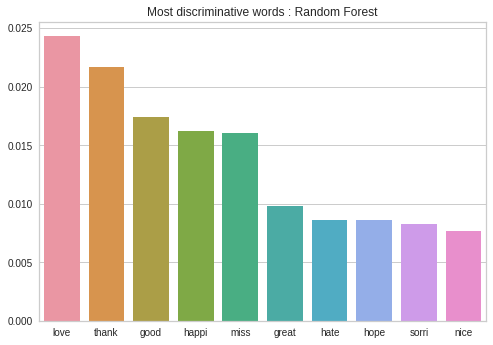

In [ ]:
sns.barplot(x=features_name[0:10], y=features_weight[0:10]).set_title("Most discriminative words : Random Forest")

In [ ]:
worst_predictors = [x for x in liste_name_feature if x[1] == 0]
len(worst_predictors)

303

# Bigramme analysis & Lemmization 

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = nltk.corpus.stopwords.words('english')

train_data_prepross_bigramm = train_data
train_data_prepross_bigramm['text'] = train_data_prepross_bigramm['text'].astype(str).apply((lambda x: nlp(x)))
train_data_prepross_bigramm['text'] = train_data_prepross_bigramm['text'].astype(str).apply(lambda x: casual_tokenize(x))

train_data_prepross_bigramm['text'] = train_data_prepross_bigramm['text'].apply(lambda x: [w.lower() for w in x if w not in stop_words
                                                                           and len(w) > 3 
                                                                           and w not in '- \t\n.,;!?'
                                                                           and w not in gensim.parsing.preprocessing.STOPWORDS])

sentences = train_data_prepross_bigramm['text'].to_list()
bigram = Phrases(sentences, min_count=1, threshold=2, delimiter=b' ')
bigram_phraser = Phraser(bigram)
train_data_prepross_bigramm['text'] = [bigram_phraser[sent] for sent in sentences]


Vocabulary = [w for W in train_data_prepross_bigramm['text'].to_list() for w in W]

Text(0.5, 1.0, 'Postive')

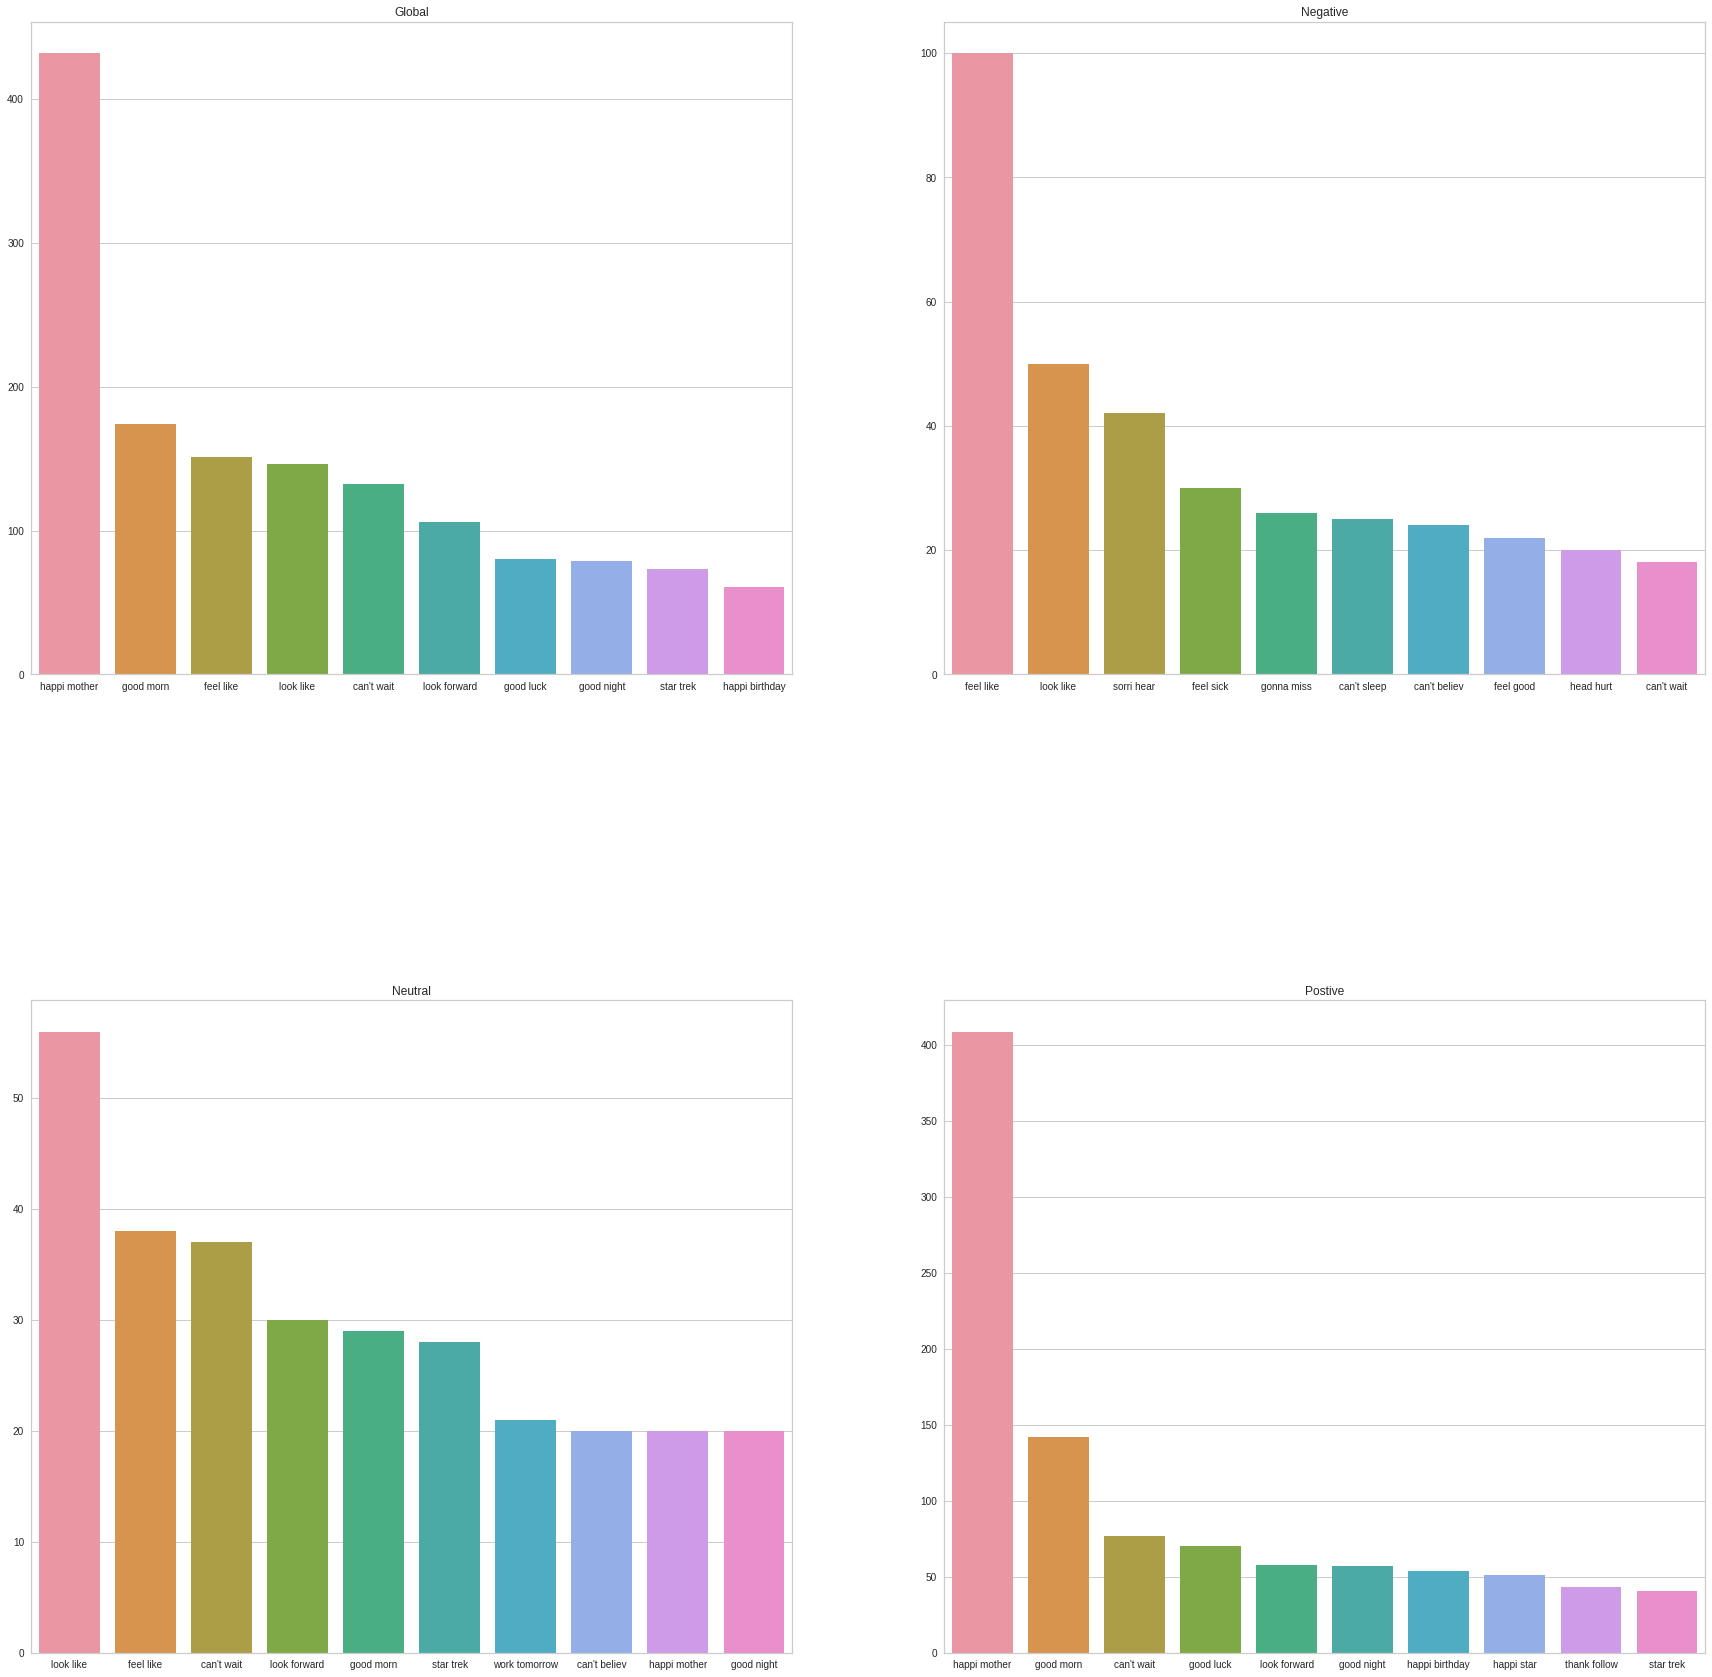

In [ ]:
Vocabulary_neutral = [w for W in train_data_prepross_bigramm.query('sentiment == "neutral"')['text'].to_list() for w in W ]
Vocabulary_negative = [w for W in train_data_prepross_bigramm.query('sentiment == "negative"')['text'].to_list() for w in W ]
Vocabulary_positive = [w for W in train_data_prepross_bigramm.query('sentiment == "positive"')['text'].to_list() for w in W ]

Vocabulary_global_bigramm = [w for w in Vocabulary if len(w.split(" ")) == 2]
Vocabulary_neutral_bigramm = [w for w in Vocabulary_neutral if len(w.split(" ")) == 2]
Vocabulary_negative_bigramm = [w for w in Vocabulary_negative if len(w.split(" ")) == 2]
Vocabulary_positive_bigramm = [w for w in Vocabulary_positive if len(w.split(" ")) == 2]

bag_of_words = Counter(Vocabulary_global_bigramm)
bag_of_words_neutral = Counter(Vocabulary_neutral_bigramm)
bag_of_words_negative = Counter(Vocabulary_negative_bigramm)
bag_of_words_positive = Counter(Vocabulary_positive_bigramm)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
fig.subplots_adjust(hspace=0.5) 

sns.barplot(x=[x[0] for x in bag_of_words.most_common(10)], y=[x[1] for x in bag_of_words.most_common(10)],ax=axes[0][0]).set_title("Global")
sns.barplot(x=[x[0] for x in bag_of_words_neutral.most_common(10)], y=[x[1] for x in bag_of_words_neutral.most_common(10)],ax=axes[1][0]).set_title("Neutral")
sns.barplot(x=[x[0] for x in bag_of_words_negative.most_common(10)], y=[x[1] for x in bag_of_words_negative.most_common(10)],ax=axes[0][1]).set_title("Negative")
sns.barplot(x=[x[0] for x in bag_of_words_positive.most_common(10)], y=[x[1] for x in bag_of_words_positive.most_common(10)],ax=axes[1][1]).set_title("Postive")

In [ ]:
import collections
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = train_data_prepross_bigramm['text'].to_list()
Vocabulary = [w for W in corpus for w in W]
Vocabulary = list(collections.Counter(Vocabulary).keys())

corpus = [' '.join(w) for w in corpus]

vectorizer = TfidfVectorizer(vocabulary=Vocabulary)
X = vectorizer.fit_transform(corpus)

In [ ]:
y = train_data_prepross['sentiment'].replace("neutral", 0).replace("negative", 1).replace("positive", 2).to_numpy()

X_shuffle_tf_idf, y_shuffle_tf_idf = shuffle(X, y)
rand_clf = RandomForestClassifier(n_jobs=-1)

cross_val_score(rand_clf,
                X_shuffle_tf_idf,
                y_shuffle_tf_idf,
                cv=3,
                scoring="roc_auc_ovo",
                n_jobs=-1)

array([0.82055226, 0.82261801, 0.82197435])

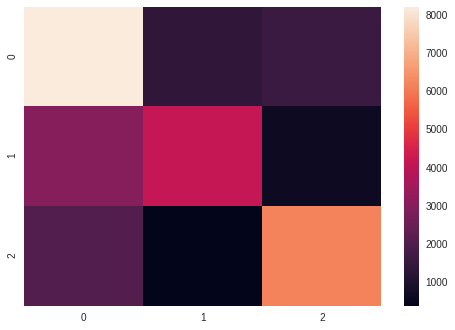

In [ ]:
y_train_pred = cross_val_predict(rand_clf, X_shuffle_tf_idf, y_shuffle_tf_idf, cv=3)
conf_mat = confusion_matrix(y_shuffle_tf_idf, y_train_pred)
sns.heatmap(conf_mat)

In [ ]:
print("Precision : {}".format(precision_score(y_shuffle_tf_idf,
                                              y_train_pred,
                                              average='macro')))

print("Rappel : {}".format(recall_score(y_shuffle_tf_idf,
                                        y_train_pred,
                                        average='macro')))

print("f1_score : {}".format(f1_score(y_shuffle_tf_idf,
                                      y_train_pred,
                                      average='macro')))

Precision : 0.6898650932386107
Rappel : 0.6646871083940152
f1_score : 0.6712839193862425


# Deep learning 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Embedding
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Shuffling

In [ ]:
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)

## Prepocessing python => tensorflow

In [ ]:
train_data_prepross, Vocabulary, bag_of_words, corpus  = preprocessing(train_data)
test_data_prepross, test_Vocabulary, test_bag_of_words, test_corpus  = preprocessing(test_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
text = train_data_prepross.text.apply(lambda x: ' '.join(x)).values
target = train_data_prepross.sentiment.replace("negative", 0).replace('neutral', 1).replace('positive', 2).values

text_test = test_data_prepross.text.apply(lambda x: ' '.join(x)).values
target_test = test_data_prepross.sentiment.replace("negative", 0).replace('neutral', 1).replace('positive', 2).values

dataset = tf.data.Dataset.from_tensor_slices((text, target))
dataset_test = tf.data.Dataset.from_tensor_slices((text_test, target_test))

In [ ]:
for features, target in dataset.take(5):
  print("{} : {}".format(features, target))

b'_aguirr go book final get cool know butch look go mail' : 2
b'strang char limit tweet ustream geogeektv live http://ustre.am/2toa' : 1
b'happen wear necklac white spot chest' : 1
b'coome ja-maiii-cah feel alllll right hahaha' : 2
b'sorri hear time rememb shall pass' : 0


In [ ]:
def preprocess(X_batch, y_batch):
    X_batch = tf.strings.substr(X_batch, 0, 300)
    X_batch = tf.strings.regex_replace(X_batch, b"<br\\s*/?>", b" ")
    X_batch = tf.strings.regex_replace(X_batch, b"[^a-zA-Z']", b" ")
    X_batch = tf.strings.split(X_batch)
    return X_batch.to_tensor(default_value=b"<pad>"), y_batch

truncated_vocabulary = [word for word, count in bag_of_words.most_common()]
words = tf.constant(truncated_vocabulary)
word_ids = tf.range(len(truncated_vocabulary), dtype=tf.int64)
vocab_init = tf.lookup.KeyValueTensorInitializer(words, word_ids)
num_oov_buckets = 1000
table = tf.lookup.StaticVocabularyTable(vocab_init, num_oov_buckets)
vocab_size = len(truncated_vocabulary)

def encode_words(X_batch, y_batch):
    return table.lookup(X_batch), y_batch

train_set = dataset.batch(32).map(preprocess)
train_set = train_set.map(encode_words).prefetch(1)

test_set = dataset_test.batch(32).map(preprocess)
test_set = test_set.map(encode_words).prefetch(1)

# Preparation tensorboard 

In [ ]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## RNN LSTM

In [ ]:
embed_size = 128

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

checkpoint_cb = keras.callbacks.ModelCheckpoint("tf_gru_tweet.h5")

model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_set, 
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

model.save("tf_gru_tweet.h5") 

Epoch 1/100
859/859 [==============================] - 43s 50ms/step - loss: 0.8257 - accuracy: 0.6316 - val_loss: 0.7370 - val_accuracy: 0.6945
Epoch 2/100
859/859 [==============================] - 43s 50ms/step - loss: 0.6472 - accuracy: 0.7393 - val_loss: 0.7613 - val_accuracy: 0.6849
Epoch 3/100
859/859 [==============================] - 43s 51ms/step - loss: 0.5225 - accuracy: 0.8018 - val_loss: 0.8171 - val_accuracy: 0.6784
Epoch 4/100
859/859 [==============================] - 43s 50ms/step - loss: 0.4350 - accuracy: 0.8441 - val_loss: 0.9155 - val_accuracy: 0.6724
Epoch 5/100
859/859 [==============================] - 43s 50ms/step - loss: 0.3654 - accuracy: 0.8705 - val_loss: 1.0817 - val_accuracy: 0.6580
Epoch 6/100
859/859 [==============================] - 42s 49ms/step - loss: 0.3186 - accuracy: 0.8877 - val_loss: 1.0674 - val_accuracy: 0.6554


# RNN LSTM Bidrectionnal

In [ ]:
embed_size = 128

checkpoint_cb = keras.callbacks.ModelCheckpoint("tf_bi-gru_tweet.h5")


model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size + num_oov_buckets, embed_size,
                           input_shape=[None]),
    keras.layers.Bidirectional(keras.layers.GRU(64, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.GRU(64)),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_set, 
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[early_stopping_cb, tensorboard_cb])

model.save("tf_bi-gru_tweet.h5")

Epoch 1/100
859/859 [==============================] - 51s 60ms/step - loss: 0.7989 - accuracy: 0.6495 - val_loss: 0.7161 - val_accuracy: 0.7069
Epoch 2/100
859/859 [==============================] - 49s 57ms/step - loss: 0.5899 - accuracy: 0.7614 - val_loss: 0.7874 - val_accuracy: 0.6707
Epoch 3/100
859/859 [==============================] - 48s 56ms/step - loss: 0.4187 - accuracy: 0.8463 - val_loss: 0.9122 - val_accuracy: 0.6455
Epoch 4/100
859/859 [==============================] - 49s 57ms/step - loss: 0.3020 - accuracy: 0.8961 - val_loss: 1.0866 - val_accuracy: 0.6238
Epoch 5/100
859/859 [==============================] - 49s 57ms/step - loss: 0.2389 - accuracy: 0.9203 - val_loss: 1.2632 - val_accuracy: 0.6195
Epoch 6/100
859/859 [==============================] - 48s 56ms/step - loss: 0.2012 - accuracy: 0.9309 - val_loss: 1.4782 - val_accuracy: 0.5972


In [ ]:
text = train_data_prepross.text.apply(lambda x: ' '.join(x)).values
target = train_data_prepross.sentiment.replace("negative", 0).replace('neutral', 1).replace('positive', 2).values

text_test = test_data_prepross.text.apply(lambda x: ' '.join(x)).values
target_test = test_data_prepross.sentiment.replace("negative", 0).replace('neutral', 1).replace('positive', 2).values

dataset = tf.data.Dataset.from_tensor_slices((text, target))

dataset_test = tf.data.Dataset.from_tensor_slices((text_test, target_test))

train_set = dataset.batch(64).prefetch(1)
test_set = dataset_test.batch(64).prefetch(1)

model = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1",
                   dtype=tf.string, input_shape=[], output_shape=[50]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(train_set, 
                    epochs=100,
                    validation_data=test_set,
                    callbacks=[early_stopping_cb, tensorboard_cb])

Epoch 1/100
430/430 [==============================] - 37s 87ms/step - loss: 0.9851 - accuracy: 0.5211 - val_loss: 0.9547 - val_accuracy: 0.5417
Epoch 2/100
430/430 [==============================] - 36s 83ms/step - loss: 0.9402 - accuracy: 0.5565 - val_loss: 0.9372 - val_accuracy: 0.5542
Epoch 3/100
430/430 [==============================] - 36s 83ms/step - loss: 0.9230 - accuracy: 0.5681 - val_loss: 0.9237 - val_accuracy: 0.5590
Epoch 4/100
430/430 [==============================] - 35s 82ms/step - loss: 0.9084 - accuracy: 0.5770 - val_loss: 0.9139 - val_accuracy: 0.5711
Epoch 5/100
430/430 [==============================] - 36s 83ms/step - loss: 0.8965 - accuracy: 0.5850 - val_loss: 0.9072 - val_accuracy: 0.5774
Epoch 6/100
430/430 [==============================] - 36s 83ms/step - loss: 0.8865 - accuracy: 0.5918 - val_loss: 0.9022 - val_accuracy: 0.5816
Epoch 7/100
430/430 [==============================] - 35s 82ms/step - loss: 0.8781 - accuracy: 0.5967 - val_loss: 0.8990 - val_ac

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

<IPython.core.display.Javascript object>

In [ ]:
target.shape

(27486,)